In [28]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

%matplotlib inline

In [29]:
X, y = make_blobs(n_samples=1000, centers=3, n_features=2)

In [30]:
X

array([[ 6.81215835, -2.63260917],
       [-6.88492061, -9.11035879],
       [-6.67318979, -7.74947634],
       ...,
       [ 3.87951712,  2.63347193],
       [ 3.29499877,  3.38430904],
       [-8.1248913 , -8.37852825]])

In [31]:
y

array([1, 2, 2, 1, 2, 0, 1, 2, 1, 0, 2, 1, 2, 1, 2, 1, 0, 0, 1, 0, 0, 2,
       0, 2, 0, 1, 0, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 0, 2, 2,
       1, 2, 0, 0, 1, 2, 1, 1, 0, 2, 1, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0,
       2, 2, 1, 0, 1, 2, 1, 2, 1, 1, 0, 1, 0, 0, 2, 1, 0, 1, 2, 0, 1, 0,
       0, 0, 0, 2, 1, 0, 0, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 2, 2, 2, 0, 0,
       2, 1, 2, 0, 2, 1, 0, 1, 2, 0, 2, 1, 2, 1, 1, 0, 1, 1, 2, 0, 0, 2,
       2, 0, 1, 2, 0, 0, 0, 1, 2, 0, 0, 1, 1, 0, 0, 1, 2, 1, 0, 2, 0, 0,
       1, 2, 1, 1, 0, 1, 0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 1, 0, 0,
       2, 0, 1, 1, 0, 0, 2, 2, 0, 0, 1, 2, 0, 0, 0, 0, 2, 1, 1, 2, 2, 2,
       0, 1, 0, 1, 1, 2, 1, 1, 1, 1, 2, 0, 0, 2, 0, 1, 1, 0, 2, 1, 0, 1,
       2, 2, 2, 2, 0, 1, 2, 0, 1, 1, 0, 0, 2, 0, 0, 1, 2, 2, 2, 1, 1, 1,
       2, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 1, 1, 1, 2, 2, 0, 0, 2, 1, 0, 1,
       2, 1, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 1, 1, 0, 2, 1, 2, 2, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 2, 0, 0, 1, 1, 0, 1, 2,

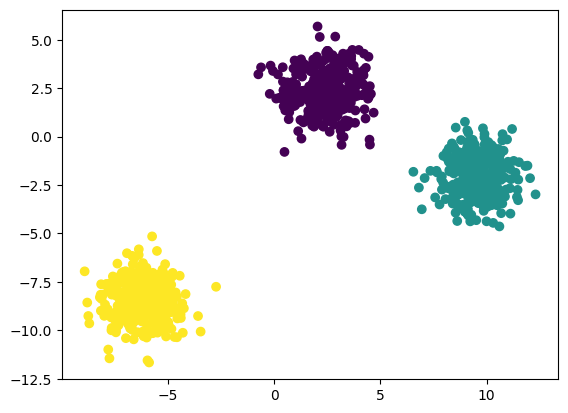

In [32]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

In [36]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
from sklearn.cluster import KMeans

In [38]:
## Elbow method To select K Value
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [39]:
wcss

[1340.0,
 289.1318246993381,
 52.02247747203781,
 43.464555726487724,
 36.561699224879874,
 28.056219728773385,
 25.92007370901085,
 23.189211155171094,
 21.449897807843104,
 20.03756182359052]

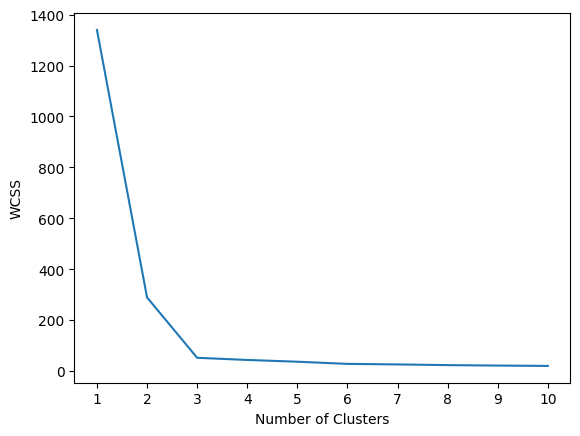

In [40]:
## plot elbow curve
plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [41]:
kmeans = KMeans(n_clusters=3, init="k-means++")

In [42]:
kmeans.fit_predict(X_train_scaled)

array([2, 2, 2, 2, 1, 0, 2, 2, 0, 0, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1,
       1, 2, 2, 0, 0, 1, 1, 1, 2, 0, 0, 1, 2, 1, 0, 1, 1, 1, 2, 2, 0, 1,
       1, 0, 1, 0, 0, 2, 0, 2, 1, 2, 0, 1, 0, 0, 0, 1, 2, 2, 1, 2, 0, 0,
       0, 1, 2, 2, 2, 0, 1, 1, 0, 1, 2, 2, 1, 1, 2, 0, 2, 0, 1, 1, 2, 1,
       0, 2, 1, 1, 1, 0, 2, 0, 1, 0, 2, 2, 2, 2, 1, 2, 2, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 2, 1, 1, 0, 0, 2, 1, 0, 2, 0, 1, 2,
       1, 2, 1, 1, 0, 0, 2, 2, 1, 1, 1, 2, 1, 0, 2, 2, 1, 0, 1, 2, 1, 0,
       0, 0, 0, 2, 0, 2, 1, 2, 0, 0, 2, 1, 2, 0, 0, 0, 1, 2, 0, 1, 1, 1,
       1, 2, 2, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 0,
       1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 0, 0, 2, 2, 0, 2, 1, 0, 0, 1, 0, 1,
       2, 2, 0, 2, 2, 1, 0, 0, 2, 2, 0, 0, 2, 0, 1, 0, 2, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 2, 1, 2, 1, 2, 2, 1, 2, 0, 1, 0, 1, 0, 2, 2, 2, 0, 0,
       1, 1, 1, 0, 0, 0, 2, 1, 2, 1, 0, 0, 2, 1, 2, 2, 2, 2, 0, 0, 1, 0,
       2, 2, 0, 0, 2, 1, 1, 2, 2, 2, 1, 0, 2, 1, 1,

In [43]:
y_pred = kmeans.predict(X_test_scaled)

In [44]:
y_pred

array([2, 0, 2, 1, 0, 2, 0, 1, 2, 2, 2, 2, 0, 1, 1, 1, 1, 2, 1, 0, 2, 2,
       2, 2, 2, 1, 2, 0, 0, 2, 0, 1, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 1, 2,
       1, 1, 1, 1, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 2, 0, 0,
       2, 2, 1, 1, 0, 2, 1, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 1,
       0, 2, 0, 2, 2, 2, 0, 1, 1, 2, 0, 1, 0, 0, 1, 0, 2, 0, 1, 0, 0, 2,
       1, 0, 1, 0, 1, 1, 2, 0, 0, 2, 1, 1, 1, 0, 0, 2, 1, 1, 2, 1, 0, 2,
       1, 2, 1, 0, 0, 2, 1, 1, 1, 1, 2, 0, 1, 2, 1, 2, 0, 0, 1, 2, 1, 2,
       2, 0, 2, 0, 0, 0, 0, 1, 0, 1, 0, 2, 2, 2, 0, 2, 0, 0, 0, 1, 1, 2,
       1, 2, 0, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0,
       0, 2, 0, 0, 1, 0, 2, 1, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 1,
       0, 2, 1, 0, 2, 0, 0, 0, 0, 0, 1, 2, 0, 0, 1, 1, 2, 0, 0, 0, 1, 1,
       0, 1, 2, 2, 1, 1, 0, 2, 2, 1, 1, 2, 1, 2, 1, 0, 0, 2, 2, 1, 2, 0,
       2, 1, 2, 1, 1, 2, 2, 0, 1, 0, 1, 2, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 2, 2, 2, 0, 1, 1, 2, 2, 0, 0, 0, 0, 0, 1,

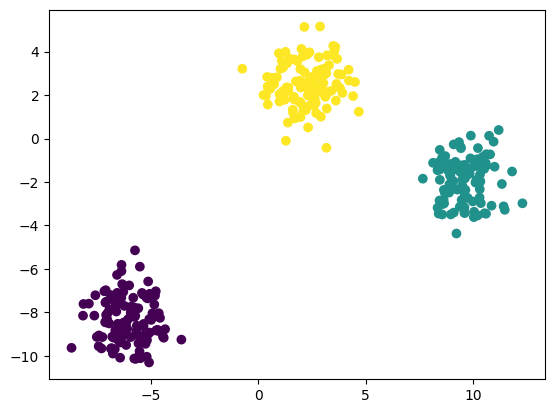

In [45]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)

In [46]:
## Validating the k value
## kneelocator
## Silhoutee scoring

In [47]:
## kneelocator
%pip install kneed

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [48]:
from kneed import KneeLocator

In [49]:
kl = KneeLocator(range(1, 11), wcss, curve="convex", direction="decreasing")

In [50]:
kl.elbow

3

In [51]:
## silhoutte score
from sklearn.metrics import silhouette_score

In [52]:
silhouette_coefficients = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X_train_scaled)
    score = silhouette_score(X_train_scaled, kmeans.labels_)
    silhouette_coefficients.append(score)

In [53]:
silhouette_coefficients

[0.7374874320784056,
 0.7967443791248591,
 0.6697255036569073,
 0.6339098476330253,
 0.48485737647123195,
 0.38401727345842657,
 0.35841217170856265,
 0.3520755515296981,
 0.34116236636282277]

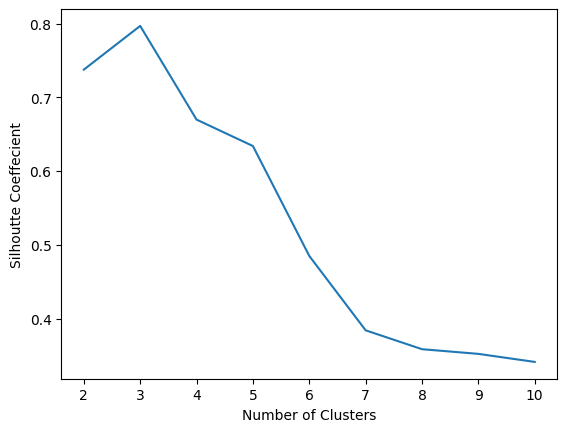

In [55]:
## plotting silhouette score
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()